In [1]:
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [47]:
TRAIN_DATA_PATH = "./linsep-traindata.csv"
TRAIN_CLASS_PATH = "./linsep-trainclass.csv"

In [76]:
# load the data
data = []
with open(TRAIN_DATA_PATH) as train_data_file:
    for line in train_data_file:
        x, y = line.strip().split(",", 2)
        data.append([float(x), float(y)])

labels = None
with open(TRAIN_CLASS_PATH) as train_class_file:
    labels = [int(line) for line in train_class_file]

In [56]:
# utils
def dot(vec1, vec2):
    return sum([x * y for x, y in zip(vec1, vec2)])

def round_product(v):
    if v >= 0:
        return 1
    else:
        return -1

In [57]:
# fitting model
learning_rate = 0.5
num_epochs = 10
weights = [0.5, 0.5]
decay = 0.7

for epoch in range(0, num_epochs):
    learning_rate *= decay ** (1 + epoch)
    for idx in range(0, len(data)):
        example = data[idx]
        dot_product = dot(example, weights)
        prediction = round_product(dot_product)
        is_error = False
        
        if prediction != labels[idx]:
            error = round_product(prediction - dot_product)
            for i in range(0, len(example)):
                weights[i] += example[i] * learning_rate * error
            is_error = True
        
        if not is_error:
            break

In [58]:
# evaluation
import pandas as pd

prediction_eval = []
for idx in range(0, len(data)):
    example = data[idx]
    dot_product = dot(example, weights)
    prediction = round_product(dot_product)
    prediction_eval.append([prediction, labels[idx]])
    
prediction_eval = pd.DataFrame(prediction_eval, columns=["prediction", "true_label"])
prediction_eval

,prediction,true_label
0,-1,-1
1,-1,-1
2,-1,-1
3,-1,-1
4,-1,-1
5,-1,-1
6,-1,-1
7,-1,-1
8,-1,-1
9,-1,-1


## Visualization

In [59]:
import matplotlib.pyplot as plt
import numpy as np

In [60]:
data_np = np.array(data)
weights_np = np.array(weights)

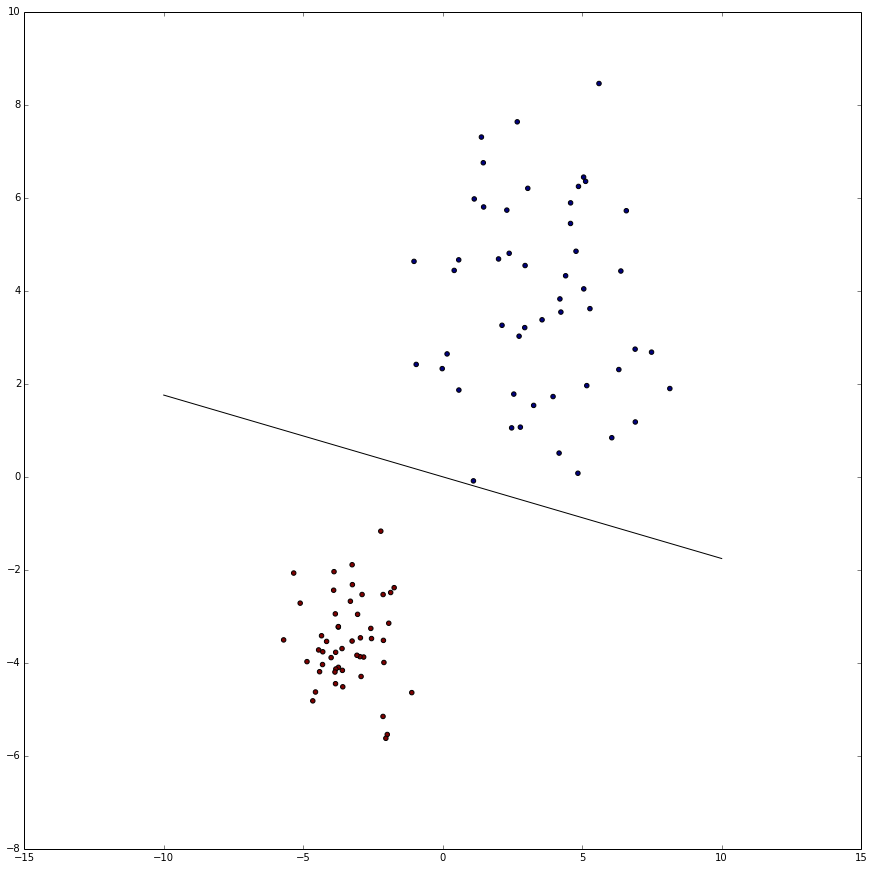

In [61]:
plt.figure(figsize=(15,15))

plt.scatter(data_np[:, 0], data_np[:, 1], c=labels)

x_axis = np.linspace(-10, 10)
y_axis = (-weights[0] / weights[1]) * x_axis 
plt.plot(x_axis, y_axis, 'k-')

plt.show()